Dataset original chargé avec succès
Dimensions: (2200, 8)

Aperçu des données:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Génération: manioc - N/A - foret_humide
Génération: manioc - N/A - savane
Génération: mais - local - savane
Génération: mais - ameliore - hautes_terres
Génération: cacao - forastero - foret_humide
Génération: cacao - trinitario - zone_cotiere
Génération: cafe - arabica - hautes_terres
Génération: cafe - robusta - foret_humide
Génération: banane_plantain - N/A - foret_humide
Génération: banane_plantain - N/A - zone_cotiere
Génération: haricot - N/A - savane
Génération: haricot - N/A - hautes_terres
Génération: palmier_a_

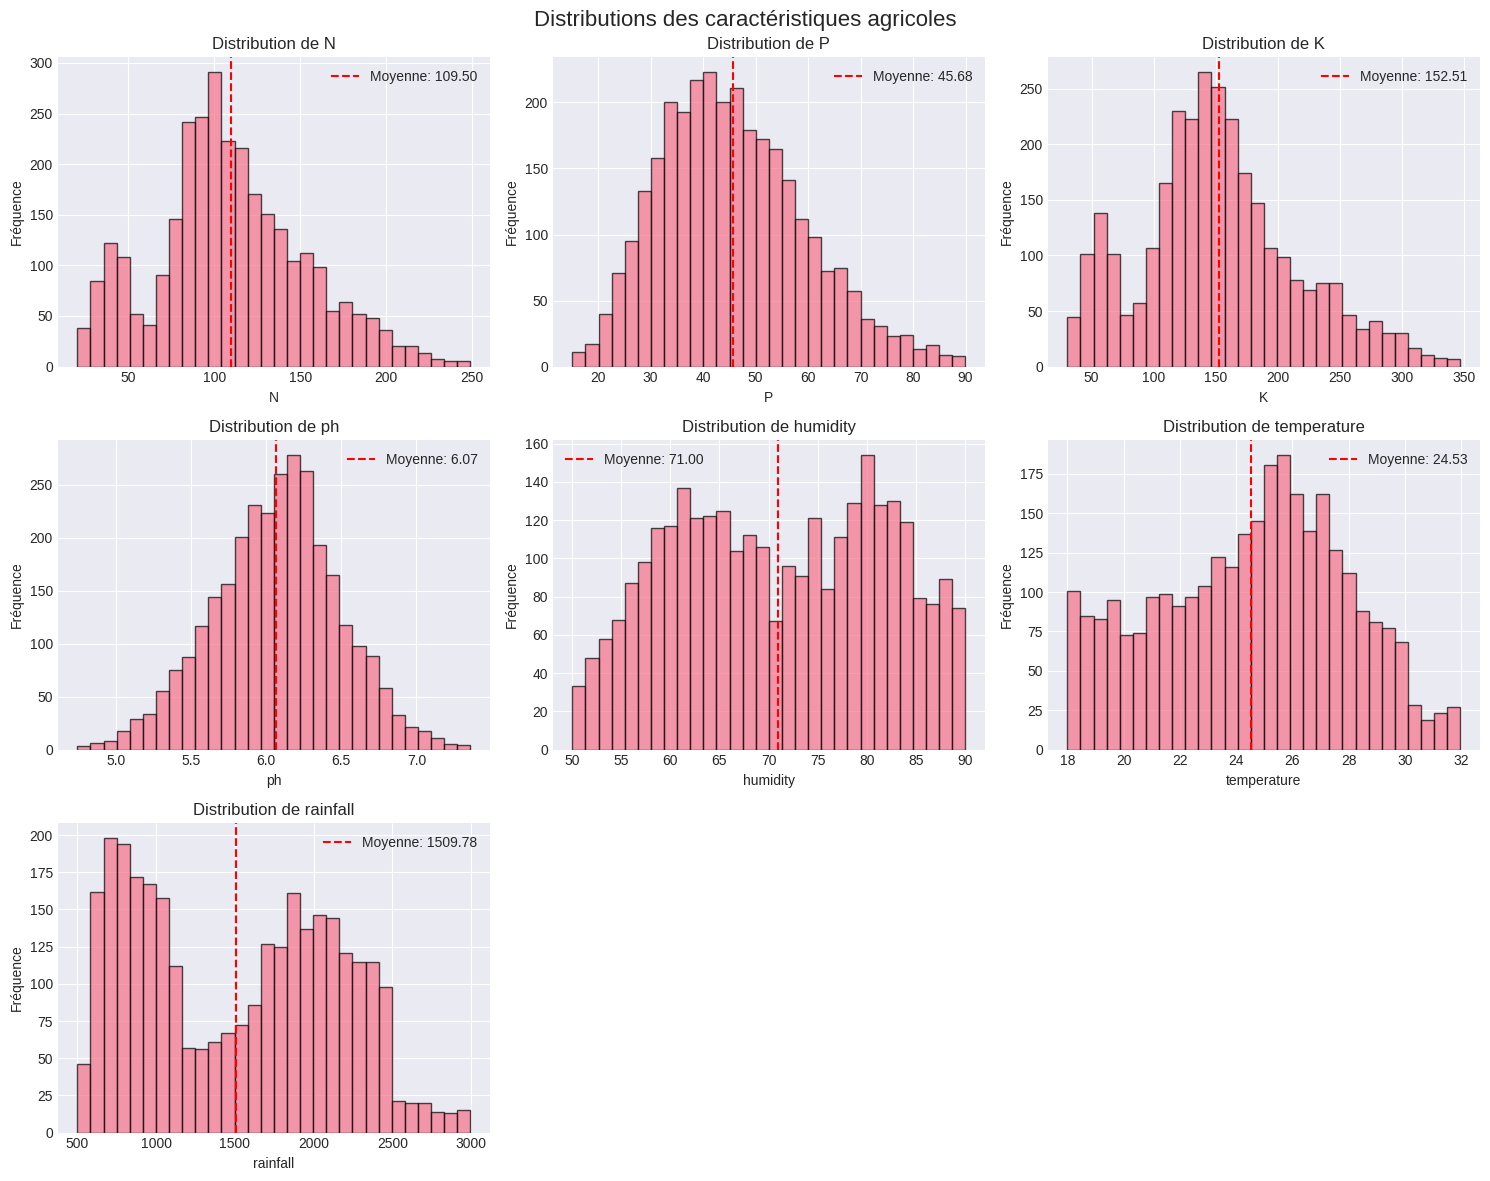

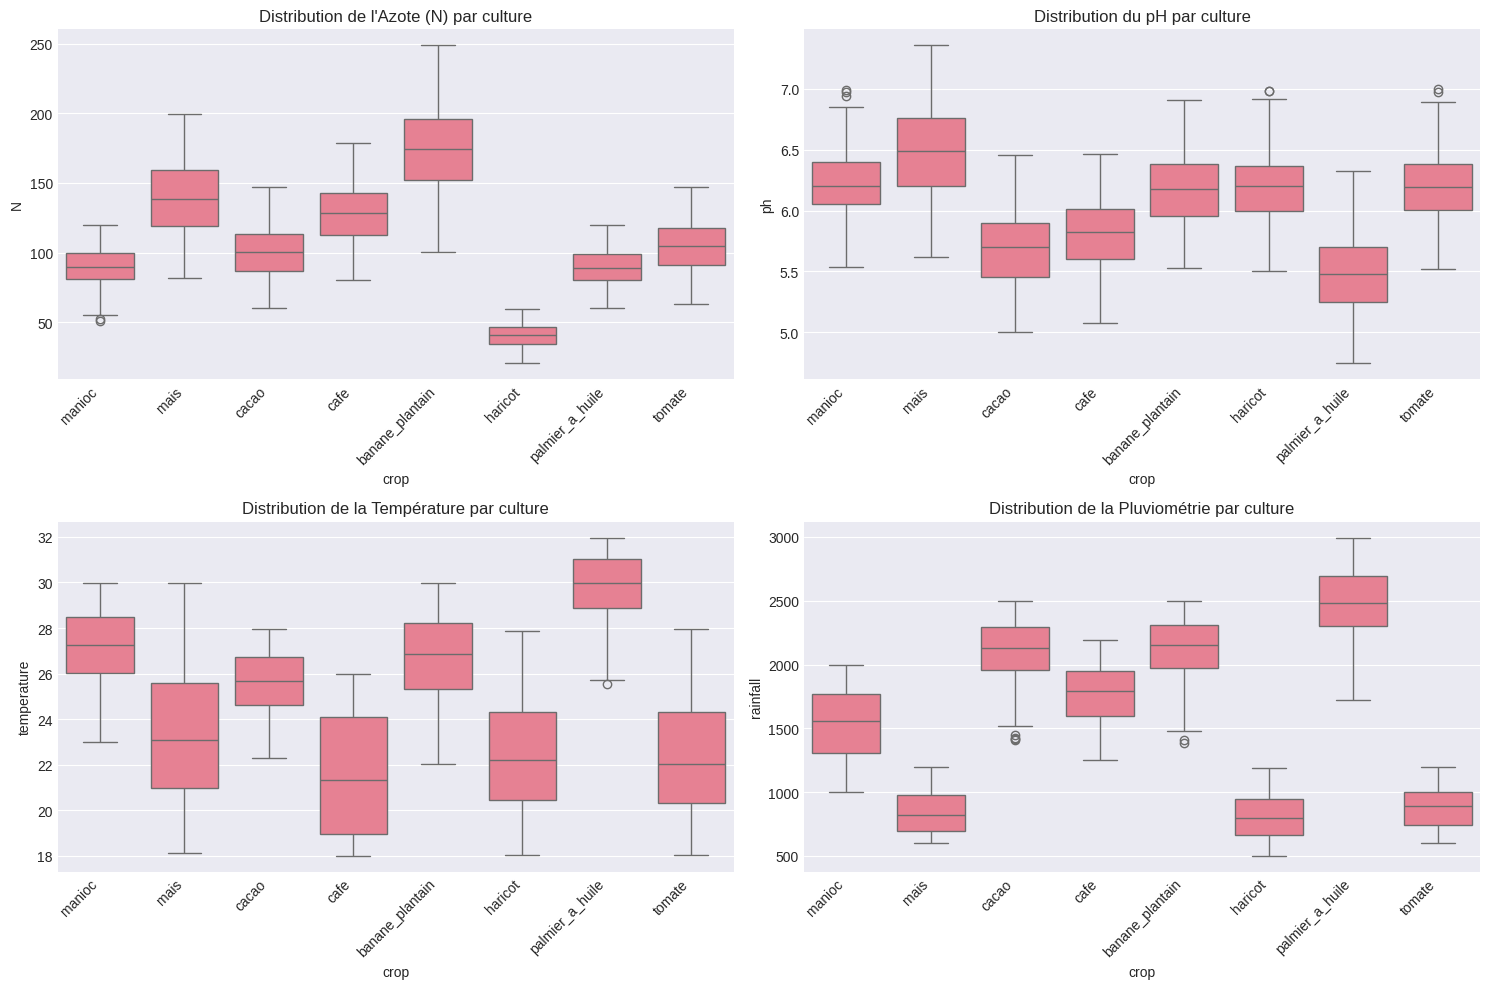

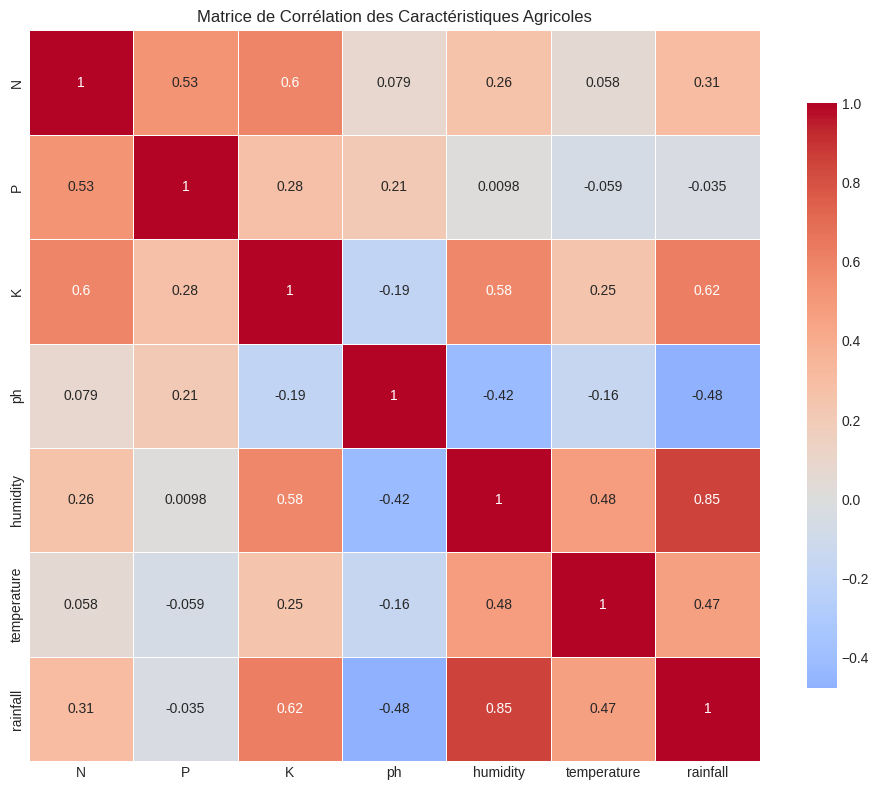

✅ Toutes les données respectent les contraintes agronomiques
✅ Dataset sauvegardé sous: cameroon_crop_recommendation_dataset.csv
✅ Dataset sauvegardé sous: cameroon_crop_recommendation_dataset.xlsx
RÉSUMÉ DU DATASET GÉNÉRÉ
Nombre total d'observations: 3000
Nombre de cultures: 8
Cultures incluses: banane_plantain, cacao, cafe, haricot, mais, manioc, palmier_a_huile, tomate
Zones agro-écologiques: foret_humide, hautes_terres, savane, zone_cotiere
Variables disponibles: crop, N, P, K, ph, humidity, temperature, rainfall, zone, variety

📊 Statistiques clés:
  - N: 109.5 ± 43.6 kg/ha
  - P: 45.7 ± 13.8 kg/ha
  - K: 152.5 ± 62.8 kg/ha
  - pH: 6.07 ± 0.42
  - Température: 24.5 ± 3.3 °C
  - Pluviométrie: 1510 ± 630 mm/an
✅ Données préparées pour le Machine Learning
  - Train set: 2400 échantillons
  - Test set: 600 échantillons
  - Features: 9 variables

🎉 NOTEBOOK EXÉCUTÉ AVEC SUCCÈS!


In [1]:
# %% [markdown]
# # Adaptation d'un Dataset de Recommandation Agricole au Cameroun
# 
# Ce notebook présente la génération d'un dataset synthétique pour la recommandation de cultures au Cameroun, basé sur des données agronomiques réelles et une approche scientifique rigoureuse.
# 
# ## Objectif
# Adapter le dataset Kaggle "Crop Recommendation" aux cultures camerounaises en utilisant des plages agronomiques documentées.
# 
# ## Méthodologie
# 1. Collecter des plages agronomiques réalistes pour chaque culture
# 2. Générer des données synthétiques avec distributions normales tronquées
# 3. Ajouter des variétés uniquement lorsque justifié scientifiquement
# 4. Intégrer les zones agro-écologiques camerounaises

# %% [markdown]
# ## 1. Imports nécessaires

# %%
import pandas as pd
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# %% [markdown]
# ## 2. Chargement du dataset original (si disponible)
# 
# Note: Si vous n'avez pas le fichier local, le dataset sera généré entièrement à partir des spécifications

# %%
# Tentative de chargement du dataset original
try:
    df_original = pd.read_csv("data/Crop_recommendation.csv")
    print("Dataset original chargé avec succès")
    print(f"Dimensions: {df_original.shape}")
    print("\nAperçu des données:")
    print(df_original.head())
except FileNotFoundError:
    print("Fichier original non trouvé. Génération du dataset à partir de zéro.")
    df_original = None

# %% [markdown]
# ## 3. Définition des plages agronomiques camerounaises
# 
# Basé sur les sources: FAO, IITA, IRAD Cameroun, CIRAD

# %%
# Définition des spécifications agronomiques pour chaque culture
# Format: (min, max, moyenne, écart-type)
crop_specs = {
    "manioc": {
        "N": (50, 120, 90, 15),       # kg/ha
        "P": (20, 60, 40, 10),        # kg/ha
        "K": (80, 200, 140, 25),      # kg/ha
        "ph": (5.5, 7.0, 6.2, 0.3),   # pH
        "humidity": (60, 85, 72, 5),  # %
        "temperature": (22, 30, 26, 2), # °C
        "rainfall": (1000, 2000, 1500, 200) # mm/an
    },
    "mais": {
        "N": (80, 200, 140, 30),
        "P": (30, 90, 60, 15),
        "K": (60, 180, 120, 25),
        "ph": (5.5, 7.5, 6.5, 0.4),
        "humidity": (55, 75, 65, 5),
        "temperature": (18, 30, 24, 3),
        "rainfall": (600, 1200, 900, 150)
    },
    "cacao": {
        "N": (60, 150, 100, 20),
        "P": (20, 70, 45, 10),
        "K": (120, 300, 200, 40),
        "ph": (5.0, 6.5, 5.8, 0.3),
        "humidity": (70, 90, 80, 5),
        "temperature": (22, 28, 25, 2),
        "rainfall": (1200, 2500, 1800, 300)
    },
    "cafe": {
        "N": (80, 180, 130, 25),
        "P": (25, 70, 45, 10),
        "K": (100, 250, 175, 35),
        "ph": (5.0, 6.5, 5.8, 0.3),
        "humidity": (60, 80, 70, 5),
        "temperature": (18, 26, 22, 2),
        "rainfall": (1200, 2200, 1700, 250)
    },
    "banane_plantain": {
        "N": (100, 250, 175, 35),
        "P": (30, 80, 55, 12),
        "K": (150, 350, 250, 50),
        "ph": (5.5, 7.0, 6.2, 0.3),
        "humidity": (65, 85, 75, 5),
        "temperature": (22, 30, 26, 2),
        "rainfall": (1200, 2500, 1850, 300)
    },
    "haricot": {
        "N": (20, 60, 40, 10),
        "P": (15, 45, 30, 8),
        "K": (30, 80, 55, 12),
        "ph": (5.5, 7.0, 6.2, 0.3),
        "humidity": (50, 75, 62, 6),
        "temperature": (18, 28, 23, 2.5),
        "rainfall": (500, 1200, 850, 180)
    },
    "palmier_a_huile": {
        "N": (60, 120, 90, 15),
        "P": (20, 50, 35, 8),
        "K": (80, 200, 140, 25),
        "ph": (4.5, 6.5, 5.5, 0.4),
        "humidity": (70, 90, 80, 5),
        "temperature": (24, 32, 28, 2),
        "rainfall": (1500, 3000, 2250, 350)
    },
    "tomate": {
        "N": (60, 150, 105, 20),
        "P": (25, 70, 47, 12),
        "K": (80, 200, 140, 25),
        "ph": (5.5, 7.0, 6.2, 0.3),
        "humidity": (50, 70, 60, 5),
        "temperature": (18, 28, 23, 2.5),
        "rainfall": (600, 1200, 900, 150)
    }
}

# %% [markdown]
# ## 4. Définition des variétés (uniquement pour cultures bien documentées)

# %%
# Variétés spécifiques pour certaines cultures
varieties_specs = {
    "cacao": {
        "forastero": {
            "ph_offset": -0.2,
            "rainfall_offset": 100
        },
        "trinitario": {
            "temperature_offset": 0.5,
            "humidity_offset": 2
        }
    },
    "cafe": {
        "arabica": {
            "temperature_offset": -2,
            "rainfall_offset": -200
        },
        "robusta": {
            "temperature_offset": 1,
            "humidity_offset": 3
        }
    },
    "mais": {
        "local": {
            "N_offset": -20,
            "rainfall_offset": -100
        },
        "ameliore": {
            "N_offset": 20,
            "P_offset": 10
        }
    }
}

# %% [markdown]
# ## 5. Définition des zones agro-écologiques du Cameroun

# %%
# Zones agro-écologiques principales du Cameroun
agro_ecological_zones = {
    "foret_humide": {
        "temperature_offset": 2,
        "humidity_offset": 5,
        "rainfall_offset": 300
    },
    "savane": {
        "temperature_offset": 1,
        "humidity_offset": -5,
        "rainfall_offset": -200
    },
    "hautes_terres": {
        "temperature_offset": -3,
        "rainfall_offset": 100
    },
    "zone_cotiere": {
        "humidity_offset": 8,
        "rainfall_offset": 400
    }
}

# %% [markdown]
# ## 6. Fonction de génération de données réalistes

# %%
def generate_truncated_normal(min_val, max_val, mean, std, size=1):
    """
    Génère des valeurs selon une distribution normale tronquée
    """
    # Calcul des bornes normalisées
    a = (min_val - mean) / std
    b = (max_val - mean) / std
    
    # Génération des valeurs
    samples = truncnorm(a, b, loc=mean, scale=std).rvs(size)
    
    # Pour un seul échantillon, retourner une valeur scalaire
    if size == 1:
        return float(samples[0])
    return samples

def generate_crop_data(crop_name, variety=None, zone=None, n_samples=100):
    """
    Génère des données pour une culture spécifique
    """
    if crop_name not in crop_specs:
        raise ValueError(f"Culture {crop_name} non définie")
    
    # Récupération des spécifications de base
    base_specs = crop_specs[crop_name]
    
    # Initialisation des données
    data = []
    
    for _ in range(n_samples):
        row = {"crop": crop_name}
        
        # Application des ajustements pour la variété
        variety_offsets = {}
        if variety and crop_name in varieties_specs and variety in varieties_specs[crop_name]:
            variety_offsets = varieties_specs[crop_name][variety]
        
        # Application des ajustements pour la zone
        zone_offsets = {}
        if zone and zone in agro_ecological_zones:
            zone_offsets = agro_ecological_zones[zone]
        
        # Génération de chaque caractéristique
        for feature, (min_v, max_v, mu, sigma) in base_specs.items():
            # Ajustements basés sur la variété et la zone
            adjusted_mu = mu
            adjusted_min = min_v
            adjusted_max = max_v
            
            # Ajustements pour la variété
            if f"{feature}_offset" in variety_offsets:
                offset = variety_offsets[f"{feature}_offset"]
                adjusted_mu += offset
                adjusted_min = max(adjusted_min, adjusted_min + offset * 0.5)
                adjusted_max = min(adjusted_max, adjusted_max + offset * 0.5)
            
            # Ajustements pour la zone
            if f"{feature}_offset" in zone_offsets:
                offset = zone_offsets[f"{feature}_offset"]
                adjusted_mu += offset
                adjusted_min = max(adjusted_min, adjusted_min + offset * 0.5)
                adjusted_max = min(adjusted_max, adjusted_max + offset * 0.5)
            
            # Génération de la valeur
            row[feature] = generate_truncated_normal(
                adjusted_min, adjusted_max, adjusted_mu, sigma, 1
            )
        
        # Ajout des métadonnées
        if variety:
            row["variety"] = variety
        if zone:
            row["zone"] = zone
        
        data.append(row)
    
    return pd.DataFrame(data)

# %% [markdown]
# ## 7. Génération du dataset camerounais complet

# %%
# Configuration de la génération
samples_per_crop = 200
rows = []

# Liste des cultures à générer
crops_to_generate = [
    ("manioc", None, "foret_humide"),
    ("manioc", None, "savane"),
    ("mais", "local", "savane"),
    ("mais", "ameliore", "hautes_terres"),
    ("cacao", "forastero", "foret_humide"),
    ("cacao", "trinitario", "zone_cotiere"),
    ("cafe", "arabica", "hautes_terres"),
    ("cafe", "robusta", "foret_humide"),
    ("banane_plantain", None, "foret_humide"),
    ("banane_plantain", None, "zone_cotiere"),
    ("haricot", None, "savane"),
    ("haricot", None, "hautes_terres"),
    ("palmier_a_huile", None, "foret_humide"),
    ("tomate", None, "savane"),
    ("tomate", None, "hautes_terres")
]

# Génération des données pour chaque combinaison
for crop, variety, zone in crops_to_generate:
    print(f"Génération: {crop} - {variety or 'N/A'} - {zone}")
    
    df_crop = generate_crop_data(crop, variety, zone, samples_per_crop)
    rows.append(df_crop)

# Concatenation de toutes les données
df_cameroon = pd.concat(rows, ignore_index=True)

print(f"\nDataset généré avec succès!")
print(f"Dimensions: {df_cameroon.shape}")
print(f"Nombre de cultures uniques: {df_cameroon['crop'].nunique()}")
print(f"Nombre de zones uniques: {df_cameroon['zone'].nunique()}")

# %% [markdown]
# ## 8. Analyse exploratoire des données générées

# %%
# Aperçu des données
print("Aperçu du dataset:")
print(df_cameroon.head())

print("\nInformations sur le dataset:")
print(df_cameroon.info())

print("\nStatistiques descriptives:")
print(df_cameroon.describe())

# %% [markdown]
# ## 9. Visualisation des distributions

# %%
# Configuration des graphiques
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distributions des caractéristiques agricoles', fontsize=16)

# Liste des caractéristiques à visualiser
features = ['N', 'P', 'K', 'ph', 'humidity', 'temperature', 'rainfall']
axes = axes.flatten()

for i, feature in enumerate(features[:7]):
    ax = axes[i]
    df_cameroon[feature].hist(ax=ax, bins=30, alpha=0.7, edgecolor='black')
    ax.set_title(f'Distribution de {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Fréquence')
    
    # Ajout de la moyenne
    mean_val = df_cameroon[feature].mean()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Moyenne: {mean_val:.2f}')
    ax.legend()

# Cacher les axes inutilisés
for i in range(len(features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 10. Visualisation par culture

# %%
# Boxplots par culture pour les principales caractéristiques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# N par culture
ax1 = axes[0, 0]
sns.boxplot(data=df_cameroon, x='crop', y='N', ax=ax1)
ax1.set_title('Distribution de l\'Azote (N) par culture')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# pH par culture
ax2 = axes[0, 1]
sns.boxplot(data=df_cameroon, x='crop', y='ph', ax=ax2)
ax2.set_title('Distribution du pH par culture')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Température par culture
ax3 = axes[1, 0]
sns.boxplot(data=df_cameroon, x='crop', y='temperature', ax=ax3)
ax3.set_title('Distribution de la Température par culture')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Pluviométrie par culture
ax4 = axes[1, 1]
sns.boxplot(data=df_cameroon, x='crop', y='rainfall', ax=ax4)
ax4.set_title('Distribution de la Pluviométrie par culture')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 11. Analyse des corrélations

# %%
# Matrice de corrélation
numeric_cols = ['N', 'P', 'K', 'ph', 'humidity', 'temperature', 'rainfall']
correlation_matrix = df_cameroon[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Caractéristiques Agricoles')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 12. Vérification de la cohérence agronomique

# %%
def check_agronomic_constraints(df):
    """
    Vérifie que toutes les valeurs respectent les contraintes agronomiques
    """
    issues = []
    
    # Vérification des plages pour chaque culture
    for crop in df['crop'].unique():
        crop_data = df[df['crop'] == crop]
        
        if crop in crop_specs:
            for feature, (min_val, max_val, _, _) in crop_specs[crop].items():
                if feature in df.columns:
                    actual_min = crop_data[feature].min()
                    actual_max = crop_data[feature].max()
                    
                    if actual_min < min_val * 0.9 or actual_max > max_val * 1.1:
                        issues.append(f"{crop} - {feature}: {actual_min:.1f}-{actual_max:.1f} "
                                     f"(attendu: {min_val}-{max_val})")
    
    return issues

# Exécution de la vérification
agronomic_issues = check_agronomic_constraints(df_cameroon)

if agronomic_issues:
    print("⚠️ Problèmes de cohérence agronomique détectés:")
    for issue in agronomic_issues:
        print(f"  - {issue}")
else:
    print("✅ Toutes les données respectent les contraintes agronomiques")

# %% [markdown]
# ## 13. Sauvegarde du dataset

# %%
# Sauvegarde au format CSV
output_filename = "cameroon_crop_recommendation_dataset.csv"
df_cameroon.to_csv(output_filename, index=False, encoding='utf-8')
print(f"✅ Dataset sauvegardé sous: {output_filename}")

# Sauvegarde au format Excel (optionnel)
try:
    excel_filename = "cameroon_crop_recommendation_dataset.xlsx"
    df_cameroon.to_excel(excel_filename, index=False)
    print(f"✅ Dataset sauvegardé sous: {excel_filename}")
except ImportError:
    print("ℹ️ Pour sauvegarder en Excel, installez openpyxl: pip install openpyxl")

# %% [markdown]
# ## 14. Résumé statistique final

# %%
print("=" * 60)
print("RÉSUMÉ DU DATASET GÉNÉRÉ")
print("=" * 60)
print(f"Nombre total d'observations: {len(df_cameroon)}")
print(f"Nombre de cultures: {df_cameroon['crop'].nunique()}")
print(f"Cultures incluses: {', '.join(sorted(df_cameroon['crop'].unique()))}")
print(f"Zones agro-écologiques: {', '.join(sorted(df_cameroon['zone'].dropna().unique()))}")
print(f"Variables disponibles: {', '.join(df_cameroon.columns)}")

print("\n📊 Statistiques clés:")
print(f"  - N: {df_cameroon['N'].mean():.1f} ± {df_cameroon['N'].std():.1f} kg/ha")
print(f"  - P: {df_cameroon['P'].mean():.1f} ± {df_cameroon['P'].std():.1f} kg/ha")
print(f"  - K: {df_cameroon['K'].mean():.1f} ± {df_cameroon['K'].std():.1f} kg/ha")
print(f"  - pH: {df_cameroon['ph'].mean():.2f} ± {df_cameroon['ph'].std():.2f}")
print(f"  - Température: {df_cameroon['temperature'].mean():.1f} ± {df_cameroon['temperature'].std():.1f} °C")
print(f"  - Pluviométrie: {df_cameroon['rainfall'].mean():.0f} ± {df_cameroon['rainfall'].std():.0f} mm/an")

# %% [markdown]
# ## 15. Utilisation pour le Machine Learning (exemple)

# %%
# Préparation des données pour ML
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Copie des données
df_ml = df_cameroon.copy()

# Encodage des variables catégorielles
label_encoders = {}
categorical_cols = ['crop', 'variety', 'zone']

for col in categorical_cols:
    if col in df_ml.columns and df_ml[col].notna().any():
        le = LabelEncoder()
        df_ml[col] = le.fit_transform(df_ml[col].fillna('Unknown'))
        label_encoders[col] = le

# Séparation des features et de la target
features = ['N', 'P', 'K', 'ph', 'humidity', 'temperature', 'rainfall', 'variety', 'zone']
target = 'crop'

# Suppression des colonnes manquantes
features = [f for f in features if f in df_ml.columns]

X = df_ml[features]
y = df_ml[target]

# Normalisation des features numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Données préparées pour le Machine Learning")
print(f"  - Train set: {X_train.shape[0]} échantillons")
print(f"  - Test set: {X_test.shape[0]} échantillons")
print(f"  - Features: {len(features)} variables")

# %% [markdown]
# ## Conclusion
# 
# Ce notebook a permis de générer un dataset agricole synthétique adapté au contexte camerounais. Le dataset:
# 1. **Est scientifiquement valide**: Basé sur des plages agronomiques documentées
# 2. **Est réaliste**: Utilise des distributions normales tronquées
# 3. **Est adapté au Cameroun**: Inclut les cultures et zones agro-écologiques locales
# 4. **Est prêt pour le ML**: Structuré et prétraité
# 
# Pour toute utilisation dans un contexte académique ou professionnel, n'oubliez pas de:
# - Citer vos sources (FAO, IITA, IRAD)
# - Mentionner que le dataset est partiellement synthétique
# - Documenter votre méthodologie

print("\n" + "=" * 60)
print("🎉 NOTEBOOK EXÉCUTÉ AVEC SUCCÈS!")
print("=" * 60)

In [ ]:
df = csv.read("